In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import torch.nn as nn
from torch.autograd import Variable

C:\Users\admin\miniconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import os
os.chdir('Images')
print(os.getcwd())

C:\Users\admin\Lab_training\Week9_10\Images


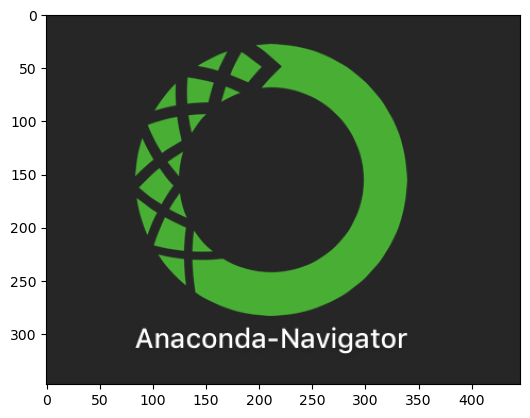

In [3]:
img = cv2.imread('anaconda.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

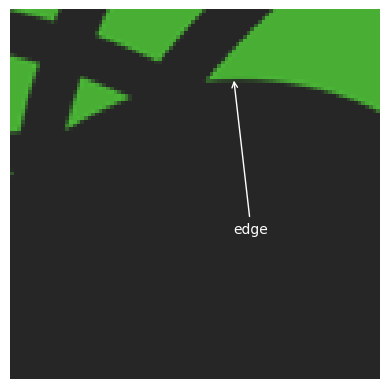

In [4]:
img_rgb_cut = img_rgb[50:150,150:250]
plt.annotate('edge', xy=(60, 18), xytext=(60, 60), color = 'white',
 arrowprops=dict(arrowstyle='->', color = 'white'))
plt.axis('off')
plt.imshow(img_rgb_cut)
plt.savefig('cut.jpg')

(100,)
(100,)
(100, 100)
(100, 100, 3)


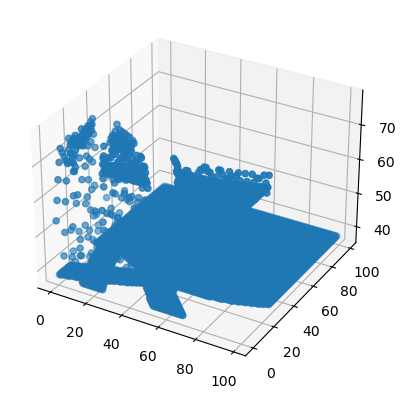

In [5]:
x = np.arange(img_rgb_cut.shape[0])
y = np.arange(img_rgb_cut.shape[1])
print(x.shape)
print(y.shape)
xx, yy = np.meshgrid(x, y)
print(xx.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(img_rgb_cut.shape)
ax.scatter(xx, yy, img_rgb_cut[:,:,0])

tensor([[[0.8824, 0.8784, 0.8745,  ..., 0.9176, 0.8627, 0.7725],
         [0.8706, 0.8784, 0.8784,  ..., 0.9216, 0.8549, 0.7412],
         [0.8706, 0.8784, 0.8824,  ..., 0.9020, 0.8431, 0.7451],
         ...,
         [0.3216, 0.3176, 0.3608,  ..., 0.6863, 0.6863, 0.6863],
         [0.3137, 0.3176, 0.3686,  ..., 0.6941, 0.7137, 0.7176],
         [0.3176, 0.3255, 0.3765,  ..., 0.6980, 0.7176, 0.7373]],

        [[0.5412, 0.5373, 0.5333,  ..., 0.5725, 0.5059, 0.4078],
         [0.5412, 0.5373, 0.5373,  ..., 0.5882, 0.5137, 0.4000],
         [0.5412, 0.5373, 0.5412,  ..., 0.5804, 0.5216, 0.4118],
         ...,
         [0.0824, 0.0784, 0.1098,  ..., 0.2784, 0.2667, 0.2549],
         [0.0706, 0.0784, 0.1294,  ..., 0.2706, 0.2745, 0.2824],
         [0.0745, 0.0824, 0.1373,  ..., 0.2667, 0.2784, 0.2902]],

        [[0.5020, 0.4980, 0.4941,  ..., 0.4941, 0.4314, 0.3373],
         [0.4980, 0.4980, 0.4980,  ..., 0.5098, 0.4392, 0.3255],
         [0.4980, 0.4980, 0.5020,  ..., 0.4980, 0.4392, 0.

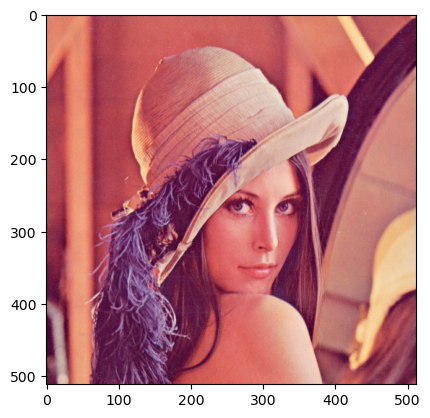

In [6]:
img_PIL = Image.open('lena.jpg')
img_ts = TF.to_tensor(img_PIL)
print(img_ts)
plt.imshow(img_ts.permute(1,2,0));

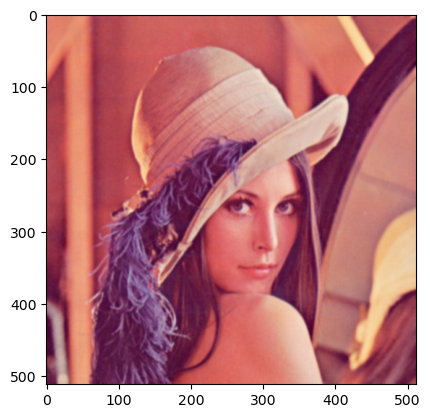

In [8]:
# Frist Step: Blur images
#img_PIL_blur = img_PIL.filter(ImageFilter.BLUR)
#img_ts_blur = TF.to_tensor(img_PIL_blur)
img_PIL_blur = img_PIL.filter(ImageFilter.GaussianBlur(radius = 1))
img_ts_blur = TF.to_tensor(img_PIL_blur)
plt.imshow(img_ts_blur.permute(1,2,0), cmap = 'gray')

In [10]:
def gradient_image(img, blur = False):
    # First Step: Blur
    if blur == True:
        img_PIL = TF.to_pil_image(img)
        img_blur = TF.to_tensor(img_PIL.filter(ImageFilter.BLUR))
        img0 = img_blur[0].unsqueeze(0).unsqueeze(0) # we can change to another channel
    else:
        img0 = img[0].unsqueeze(0).unsqueeze(0) # we can change to another channel
    # Second Step: Gradient
    Sx = torch.Tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    conv1 = nn.Conv2d(1, 1, kernel_size = 3, stride = 1, padding = 1)
    conv1.weight = nn.Parameter(Sx.unsqueeze(0).unsqueeze(0))
    Gx = conv1(Variable(img0)).data.reshape(1, img0.shape[2], img0.shape[3])
    
    Sy = torch.Tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    conv2 = nn.Conv2d(1, 1, kernel_size = 3, stride = 1, padding = 1)
    conv2.weight = nn.Parameter(Sy.unsqueeze(0).unsqueeze(0))
    Gy = conv2(Variable(img0)).data.reshape(1, img0.shape[2], img0.shape[3])
    
    G_magnitude = torch.sqrt(Gx**2+Gy**2)
    G_magnitude /= G_magnitude.max() # normalize
    G_orientation = torch.arctan(Gy/Gx)
    return Gx,Gy,G_magnitude, G_orientation

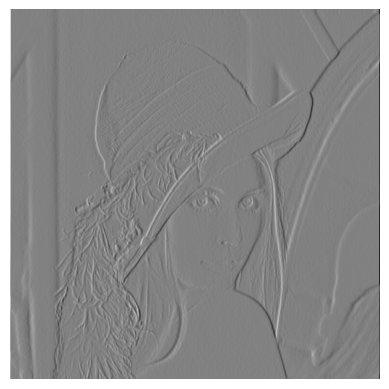

In [19]:
Gx,Gy,G_magnitude,G_orientation = gradient_image(img_ts, blur = False)
plt.axis('off')
plt.imshow(Gx.squeeze(), cmap = 'gray')

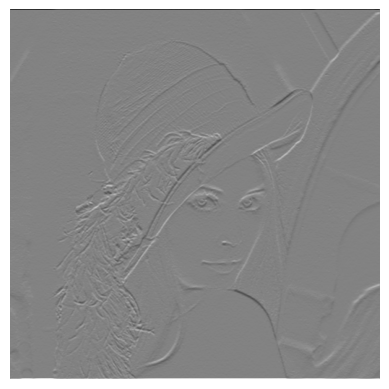

In [20]:
plt.axis('off')
plt.imshow(Gy.squeeze(), cmap = 'gray')

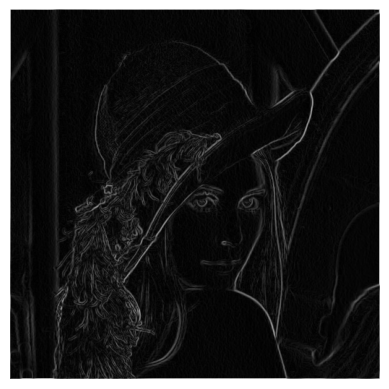

In [21]:
plt.axis('off')
plt.imshow(G_magnitude.squeeze(0), cmap = 'gray')